# 1. 전처리 완료된 데이터 바로 사용 

# 2. TF-IDF 기법 사용

# 3. 데이터 셋을 늘리면 정확도 및 유사도 측정에 큰 도움이 됨
### 제 pc로는 무리가 있습니다..

# 4. 유사도 탑10 시각화 완료

# 5. 코드 함수화 필요(마지막에 정리)

In [2]:
import pandas as pd
import numpy as np
from string import punctuation
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import nltk 
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from sklearn.metrics.pairwise import cosine_similarity

df = pd.read_csv('D:\\python__\\project_2.csv')
# df = df[['Title', 'image','description']]                                     # 필요 변수만

# df = df.dropna(axis = 0, how = 'any')                                         # 결측지 제거

# np.random.seed(123)
# label = np.random.randint(0,len(df),130000)                                     # 데이터 수가 너무 많아서 7000개 랜덤으로 추출
# df = df.iloc[label].reset_index()
# del df['index']

In [3]:
df = df.drop_duplicates('description')    # 중복값 제거 데이터프레임 생성
df.index = range(len(df))    # 인덱스 재지정
df

### 전처리 완료된 데이터

,Title,image,description
0,Dr. Seuss: American Icon,http://books.google.com/books/content?id=IjvHQ...,philip nel takes fascinating look key aspects ...
1,Wonderful Worship in Smaller Churches,http://books.google.com/books/content?id=2tsDA...,resource includes twelve principles understand...
2,Whispers of the Wicked Saints,http://books.google.com/books/content?id=aRSIg...,julia thomas finds life spinning control death...
3,The Church of Christ: A Biblical Ecclesiology ...,http://books.google.com/books/content?id=kVqRa...,church christ biblical ecclesiology today resp...
4,Saint Hyacinth of Poland,http://books.google.com/books/content?id=lmLqA...,story children 10 st. hyacinth dominican plant...
...,...,...,...
126445,Autodesk Inventor 10 Essentials Plus,http://books.google.com/books/content?id=zxHRC...,autodesk inventor 2017 essentials plus provide...
126446,The Orphan Of Ellis Island (Time Travel Advent...,http://books.google.com/books/content?id=J7M-N...,school trip ellis island dominick avaro ten-ye...
126447,Red Boots for Christmas,http://books.google.com/books/content?id=3n8k6...,everyone village friedensdorf happily preparin...
126448,The Autograph Man,http://books.google.com/books/content?id=JM6YV...,alex-li tandem sells autographs business hunt ...


In [14]:
# 제 컴퓨터로는 데이터 개수를 줄여야 돌아갑니다...
df1 = df.head(20000).copy()

In [15]:
df1

,Title,image,description
0,Dr. Seuss: American Icon,http://books.google.com/books/content?id=IjvHQ...,philip nel takes fascinating look key aspects ...
1,Wonderful Worship in Smaller Churches,http://books.google.com/books/content?id=2tsDA...,resource includes twelve principles understand...
2,Whispers of the Wicked Saints,http://books.google.com/books/content?id=aRSIg...,julia thomas finds life spinning control death...
3,The Church of Christ: A Biblical Ecclesiology ...,http://books.google.com/books/content?id=kVqRa...,church christ biblical ecclesiology today resp...
4,Saint Hyacinth of Poland,http://books.google.com/books/content?id=lmLqA...,story children 10 st. hyacinth dominican plant...
...,...,...,...
19995,City,http://books.google.com/books/content?id=F0B5C...,siena city secrets charming intimate portrait ...
19996,Pasajes: Lengua,http://books.google.com/books/content?id=JQqoP...,pasajes series one widely used highly respecte...
19997,Growing Up Nigger Rich,http://books.google.com/books/content?id=kTIBn...,intricately crafted novel homecoming south gay...
19998,Inside One Author's Heart,http://books.google.com/books/content?id=cGAhz...,inside one author heart dedicated ms. price re...


In [16]:
co1 = df1.description.copy()

In [17]:
co1

0        philip nel takes fascinating look key aspects ...
1        resource includes twelve principles understand...
2        julia thomas finds life spinning control death...
3        church christ biblical ecclesiology today resp...
4        story children 10 st. hyacinth dominican plant...
                               ...                        
19995    siena city secrets charming intimate portrait ...
19996    pasajes series one widely used highly respecte...
19997    intricately crafted novel homecoming south gay...
19998    inside one author heart dedicated ms. price re...
19999    clive barker author thief always delivers epic...
Name: description, Length: 20000, dtype: object

In [18]:
# TF - IDF 기법으로 벡터화
# 20000개의 줄거리는 약 80000개의 단어로 이루어져있다. (전처리 완료돼서 많이 줄었다.)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tf_idf = TfidfVectorizer()
tf_idf_matrix = tf_idf.fit_transform(co1)
print('TF-IDF 행렬의 크기(shape) :',tf_idf_matrix.shape)

TF-IDF 행렬의 크기(shape) : (20000, 80139)


In [19]:
# 전체 유사도 계산
cos_sim = cosine_similarity(tf_idf_matrix, tf_idf_matrix)
print('코사인 유사도 연산 결과 :',cos_sim.shape)

코사인 유사도 연산 결과 : (20000, 20000)


In [20]:
title_idx = dict(zip(df1['Title'], df1.index))

# 도서 제목 입력하면 인덱스를 리턴
idx = title_idx['Whispers of the Wicked Saints']
print(idx)

2


In [21]:
def Recommend(title, cos_sim=cos_sim):
    
    # 도서 제목 입력하면 인덱스를 리턴
    idx = title_idx[title]

    # 도서 줄거리 유사도 전부 가져오기
    sim = list(enumerate(cos_sim[idx]))

    # 유사도에 따라 정렬하기
    sim = sorted(sim, key=lambda x: x[1], reverse=True)

    # 유사도 탐10 가져오기
    sim = sim[1:11]

    # 유사도 탑10 인덱스 가져오기
    rec_idx = [idx[0] for idx in sim]

    # 유사도 탑10 제목 가져오기
    print(sim)                       # (인덱스, 유사도)
    return df['Title'].iloc[rec_idx]


Recommend('Dramatica for Screenwriters')

[(7447, 0.14770519320745665), (10080, 0.08238187663165679), (11613, 0.08019615627825852), (5946, 0.07938577515739939), (4083, 0.07789993730287266), (6521, 0.07410628081281442), (574, 0.07141292567842679), (792, 0.06477766969678819), (9296, 0.06296061861480656), (2610, 0.06215777592385126)]


7447                             Screenwriting For Dummies
10080    The Love of a D-Girl: A Novel of Sex, Lies, an...
11613    Characters, Emotion & Viewpoint: Techniques an...
5946                        Tiberius: The Resentful Caesar
4083                            USMLE Step 2 Mock Exam, 1e
6521                                            The Chosen
574      Read Write Inc. Phonics: Get Writing! Yellow S...
792         Child and Adolescent Development for Educators
9296                                      a capital affair
2610                       How to Write a Movie in 21 Days
Name: Title, dtype: object

In [22]:
a = Recommend('Dramatica for Screenwriters')

[(7447, 0.14770519320745665), (10080, 0.08238187663165679), (11613, 0.08019615627825852), (5946, 0.07938577515739939), (4083, 0.07789993730287266), (6521, 0.07410628081281442), (574, 0.07141292567842679), (792, 0.06477766969678819), (9296, 0.06296061861480656), (2610, 0.06215777592385126)]


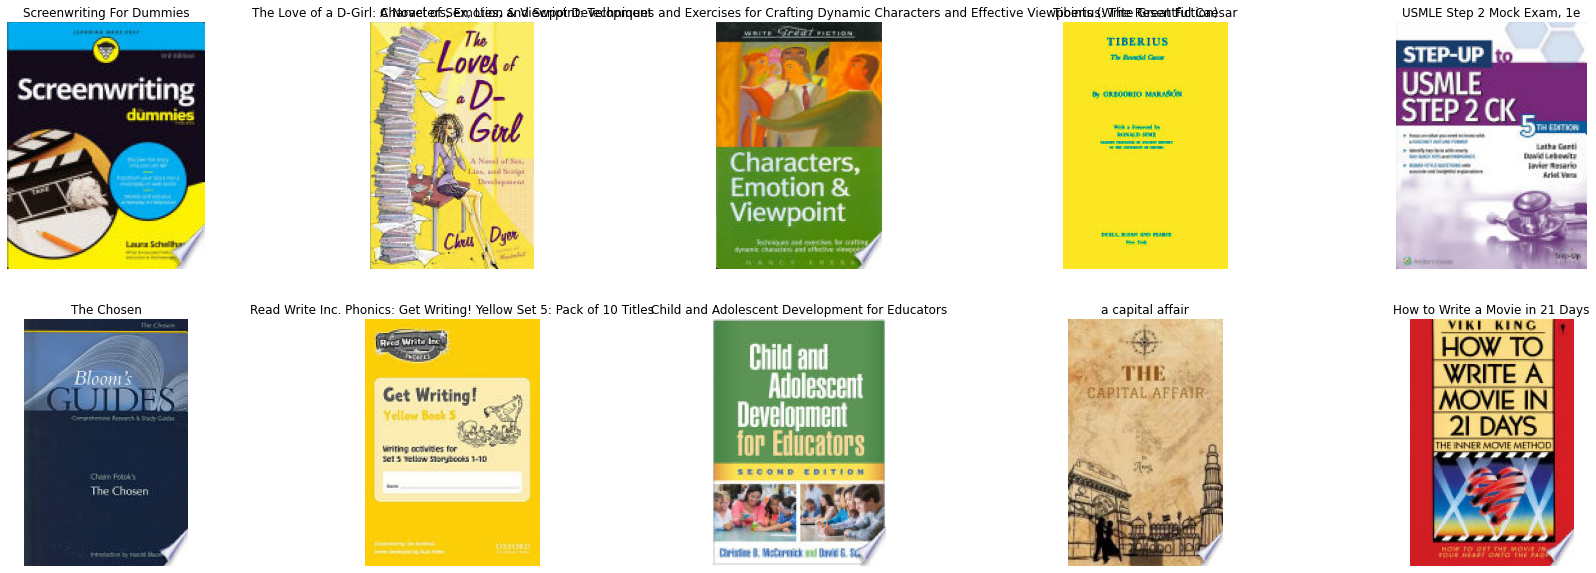

In [23]:
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(30, 10))
plt.tight_layout()

for i in range(10):
    response = requests.get(df1.loc[a.index[i]].image)
    img = Image.open(BytesIO(response.content))
    fig.add_subplot(2, 5, i + 1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df1.loc[a.index[i]]['Title'])